<a href="https://colab.research.google.com/github/fredyvelasquezgt/Lab-9-DL/blob/main/lab_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 9 - Deep Learning

Autores

- Angel Higueros 20460
- Fredy Velasquez 2010111

### Task 1 - Práctica

1. Preparacion de datos

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

In [4]:
data_path = "/content/train.csv"

data = pd.read_csv(data_path)

In [11]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   store   913000 non-null  int64         
 2   item    913000 non-null  int64         
 3   sales   913000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 34.8 MB


In [5]:
# Verificando valores nulos
print(data.isnull().sum())

date     0
store    0
item     0
sales    0
dtype: int64


In [6]:
# Convertir la columna 'date' a datetime
data['date'] = pd.to_datetime(data['date'])

# Escalado de la columna 'sales'
scaler = MinMaxScaler(feature_range=(0, 1))
data['sales'] = scaler.fit_transform(data[['sales']])

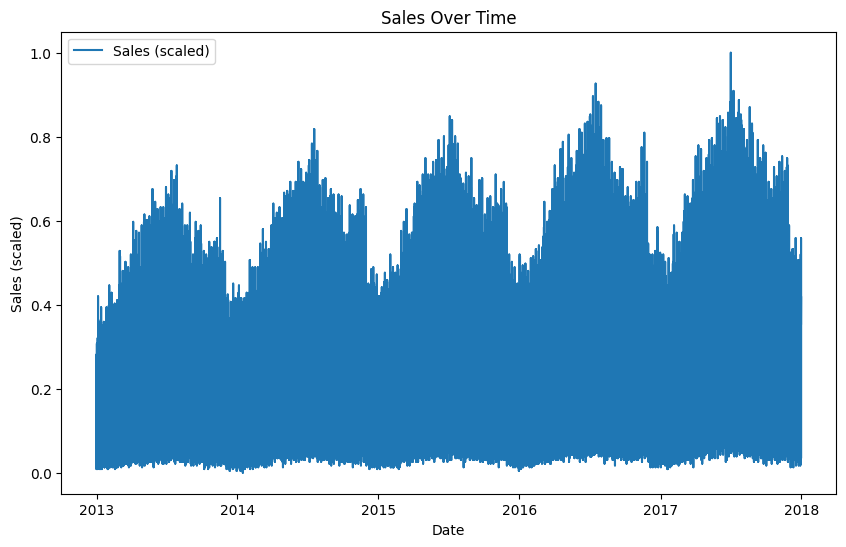

In [7]:
import matplotlib.pyplot as plt

# Asegúrate de que tus datos estén ordenados por fecha si no lo están ya
data = data.sort_values('date')

# Crear un gráfico de líneas de ventas a lo largo del tiempo
plt.figure(figsize=(10,6))  # cambiar el tamaño del gráfico según sea necesario
plt.plot(data['date'], data['sales'], label='Sales (scaled)')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales (scaled)')
plt.legend()
plt.show()


2. Preparacion de datos

In [9]:
# Asumiendo que 'data' es tu DataFrame y ya has realizado la limpieza y escalado
train_data = data[data['date'] < '2016-01-01']
test_data = data[data['date'] >= '2016-01-01']

# Debes asegurarte de que solo estés trabajando con la columna que deseas predecir, en este caso, 'sales'
train_data = train_data[['sales']].values
test_data = test_data[['sales']].values


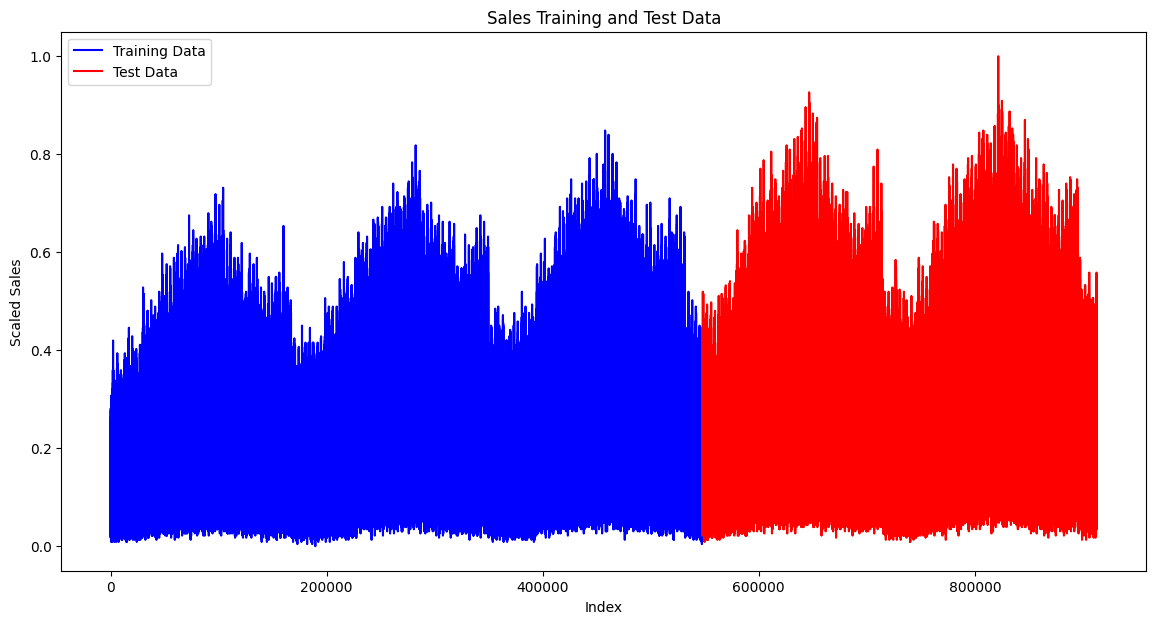

In [10]:
import matplotlib.pyplot as plt

# Crear índices para el eje x, que son simplemente números enteros secuenciales
train_index = range(len(train_data))
test_index = range(len(train_data), len(train_data) + len(test_data))

plt.figure(figsize=(14,7))

# Graficar datos de entrenamiento
plt.plot(train_index, train_data, label='Training Data', color='blue')

# Graficar datos de prueba
plt.plot(test_index, test_data, label='Test Data', color='red')

plt.title('Sales Training and Test Data')
plt.xlabel('Index')
plt.ylabel('Scaled Sales')
plt.legend()
plt.show()


In [16]:
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:(i + window_size), 0])
        y.append(data[i + window_size, 0])
    return np.array(X), np.array(y)

In [17]:
window_size = 60  # Por ejemplo, usar los 60 puntos de datos anteriores para predecir el siguiente

# Crear secuencias para entrenamiento
X_train, y_train = create_sequences(train_data, window_size)

# Crear secuencias para prueba
X_test, y_test = create_sequences(test_data, window_size)

# Es importante que los datos estén en la forma correcta para alimentar a la LSTM
# Reshape [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Dividir los datos de entrenamiento para crear un conjunto de validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)


3. Seleccion de modelo

- Se usara LSTM

4. Arquitectura del modelo

In [18]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1)) # Salida de una unidad para la predicción de ventas

model.compile(optimizer='adam', loss='mean_squared_error')


5. Entrenamiento del modelo

In [ ]:
# Entrenar el modelo
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50
13686/13686 [==============================] - 414s 30ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 2/50
13686/13686 [==============================] - 406s 30ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 3/50
13686/13686 [==============================] - 404s 30ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 4/50
13686/13686 [==============================] - 403s 29ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 5/50
13686/13686 [==============================] - 404s 29ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 6/50
13686/13686 [==============================] - 404s 30ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 7/50
13686/13686 [==============================] - 404s 29ms/step - loss: 0.0013 - val_loss: 9.8134e-04
Epoch 8/50
13686/13686 [==============================] - 403s 29ms/step - loss: 0.0013 - val_loss: 9.8694e-04
Epoch 9/50
13686/13686 [==============================] - 404s 30ms/step - loss: 0.0013 - val_loss: 9.9559e-04
Epoch 10/50
13686/13686 [

In [19]:
model.save('my_model.keras')

In [ ]:
from tensorflow.keras.models import load_model

# Cargar el modelo
new_model = load_model('my_model.keras')

In [ ]:
# Evaluar el modelo con datos de prueba
loss = new_model.evaluate(X_test, y_test)
print(f"Loss: {loss}")

11420/11420 [==============================] - 117s 10ms/step - loss: 0.0014
Loss: 0.001352919964119792


In [ ]:
predicted_sales = new_model.predict(X_test)

11420/11420 [==============================] - 116s 10ms/step


In [ ]:
from keras.models import load_model
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
# Realizar predicciones en el conjunto de test
predictions = new_model.predict(X_test)


# Calcular las métricas de evaluación
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)  # La raíz cuadrada del MSE es el RMSE

# Imprimir las métricas
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')


11420/11420 [==============================] - 118s 10ms/step
MAE: 0.028124939863277777
MSE: 0.0013529171084681877
RMSE: 0.03678202153862927


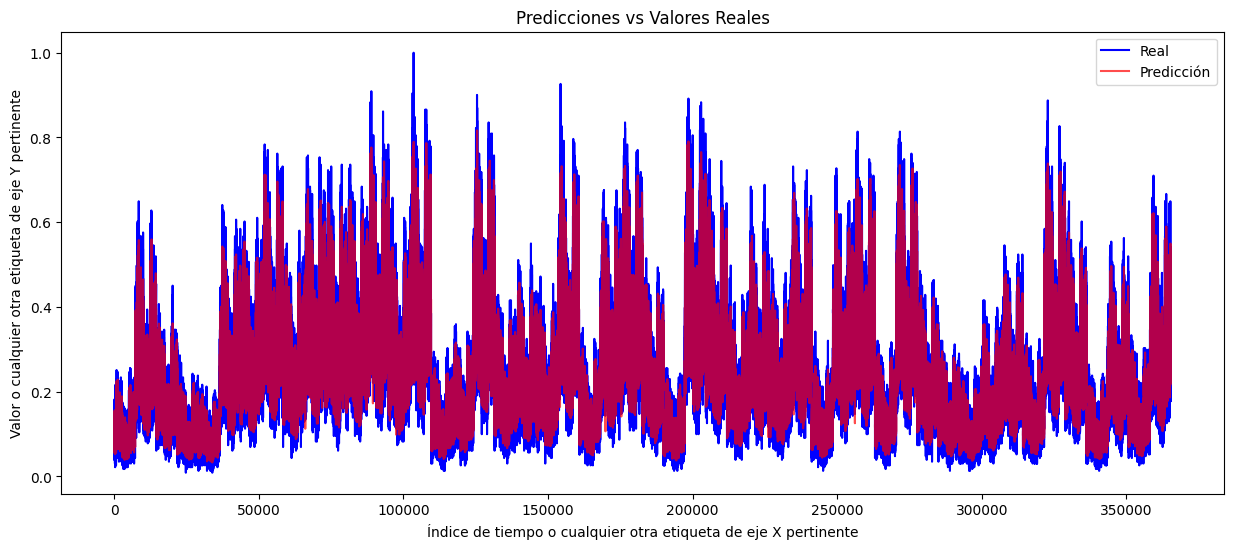

In [ ]:
# Crear una figura y un set de subplots
plt.figure(figsize=(15,6))

# Dibujar los valores reales
plt.plot(y_test, color='blue', label='Real')

# Dibujar las predicciones
plt.plot(predictions, color='red', alpha=0.7, label='Predicción')

# Títulos y etiquetas
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Índice de tiempo o cualquier otra etiqueta de eje X pertinente')
plt.ylabel('Valor o cualquier otra etiqueta de eje Y pertinente')
plt.legend()  # Muestra la leyenda

# Mostrar la gráfica
plt.show()

7. Ajuste de hiperparámetros


Cambios realizados:

*   BatchNormalization: Se aplicó normalización por lotes al inicio para facilitar el aprendizaje rápido y estable.
*   Unidades y capas LSTM: Se aumentaron las unidades en la primera capa LSTM a 100 y se usaron un total de tres capas LSTM para capturar relaciones temporales más complejas.
*   Dropout: Se implementó un 50% de dropout después de cada capa LSTM para combatir el sobreajuste.
*   Optimizador: Se usó Adam con una tasa de aprendizaje de 0.001, que es un equilibrio entre la velocidad de entrenamiento y la capacidad de convergencia.
*   Entrenamiento: Se entrenó el modelo durante 40 épocas con un tamaño de lote de 64. Estos números afectan cómo de rápido y qué tan bien el modelo puede aprender.
*   Evaluación y Visualización: Se calculó MAE, MSE, y RMSE para evaluar el rendimiento, y luego se trazaron las predicciones en comparación con los valores reales para visualizar qué tan bien el modelo está prediciendo los datos.








Epoch 1/20
6843/6843 [==============================] - 1043s 152ms/step - loss: 0.0026 - val_loss: 0.0011
Epoch 2/20
6843/6843 [==============================] - 1035s 151ms/step - loss: 0.0021 - val_loss: 0.0017
Epoch 3/20
6843/6843 [==============================] - 1092s 160ms/step - loss: 0.0024 - val_loss: 0.0010
Epoch 4/20
6843/6843 [==============================] - 1039s 152ms/step - loss: 0.0018 - val_loss: 9.8741e-04
Epoch 5/20
6843/6843 [==============================] - 1038s 152ms/step - loss: 0.0018 - val_loss: 0.0010
Epoch 6/20
6843/6843 [==============================] - 1096s 160ms/step - loss: 0.0018 - val_loss: 0.0010
Epoch 7/20
6843/6843 [==============================] - 1038s 152ms/step - loss: 0.0018 - val_loss: 9.7022e-04
Epoch 8/20
6843/6843 [==============================] - 1040s 152ms/step - loss: 0.0017 - val_loss: 9.8858e-04
Epoch 9/20
6843/6843 [==============================] - 1095s 160ms/step - loss: 0.0019 - val_loss: 9.9120e-04
Epoch 10/20
6843/6843

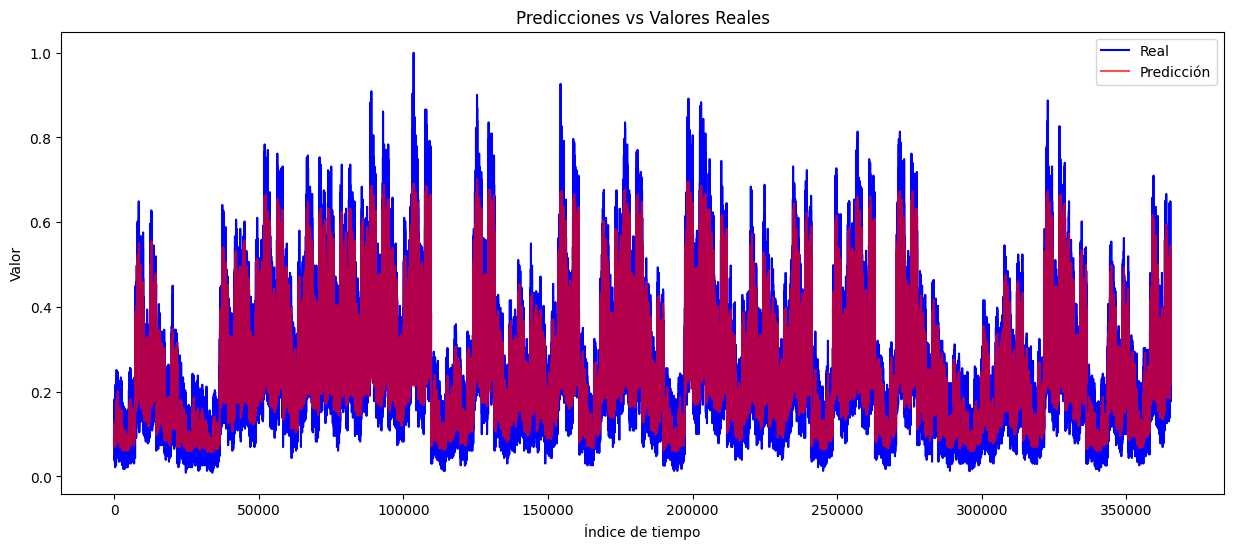

In [15]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, BatchNormalization
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Construcción del modelo
model = Sequential()

# Normalización por lotes antes de las capas LSTM
model.add(BatchNormalization(input_shape=(X_train.shape[1], 1)))

# Aumento en el número de unidades, adición de más capas LSTM y aumento del dropout
model.add(LSTM(units=100, return_sequences=True))  # Aumento a 100 unidades
model.add(Dropout(0.5))  # Aumento al 50%
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.5))  # Aumento al 50%
model.add(LSTM(units=50))
model.add(Dropout(0.5))  # Aumento al 50%

# Capa de salida
model.add(Dense(units=1))

# Compilación del modelo con una tasa de aprendizaje modificada
adam_optimizer = Adam(lr=0.001)
model.compile(optimizer=adam_optimizer, loss='mean_squared_error')

# Entrenamiento del modelo con más épocas y un tamaño de lote diferente
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val))

# Realizar predicciones
predictions = model.predict(X_test)

# Calcular las métricas de evaluación
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)  # RMSE

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

# Crear una figura y un set de subplots
plt.figure(figsize=(15,6))

# Dibujar los valores reales
plt.plot(y_test, color='blue', label='Real')

# Dibujar las predicciones
plt.plot(predictions, color='red', alpha=0.7, label='Predicción')

# Títulos y etiquetas
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Índice de tiempo')
plt.ylabel('Valor')
plt.legend()

# Mostrar la gráfica
plt.show()


8. Forescasting

In [21]:

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Función para crear secuencias
def create_sequences(data, window_size):
    X = []
    for i in range(len(data) - window_size):
        X.append(data[i:(i + window_size), 0])
    return np.array(X)

# Cargar el modelo
model = load_model('my_model.keras')  # Ajusta esto a tu situación


In [25]:
window_size = 60
forecast_length = 90  # Para pronosticar 3 meses
results = pd.DataFrame()

# Limitamos el bucle a 2 tiendas, como se solicitó
for store in range(1, 3):
    store_data = data[data['store'] == store]

    # Sumamos las ventas de todos los artículos para la tienda actual
    store_sales = store_data.groupby(['date'])['sales'].sum().reset_index()

    # Usa los últimos datos para hacer las predicciones
    last_sequence = store_sales['sales'].values[-window_size:].reshape(1, window_size, 1)

    # Realizar las predicciones iterativamente y agregar cada predicción a la secuencia para las próximas
    forecasts = []
    for i in range(forecast_length):
        next_point = model.predict(last_sequence)
        forecasts.append(next_point[0][0])
        last_sequence = np.roll(last_sequence, shift=-1)
        last_sequence[0][-1][0] = next_point

    # Agregar las predicciones al dataframe de resultados
    forecast_dates = pd.date_range(start='2017-01-01', periods=forecast_length)
    for j, forecast_date in enumerate(forecast_dates):
        results = results.append({
            'store': store,
            # 'item': item,  # Ya no estamos prediciendo por artículo, así que esta línea no es necesaria
            'date': forecast_date.strftime('%Y-%m-%d'),
            'forecasted_sales': forecasts[j]
        }, ignore_index=True)

print(results)


1/1 [==============================] - 0s 39ms/step


<ipython-input-25-20957b63df68>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
<ipython-input-25-20957b63df68>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
<ipython-input-25-20957b63df68>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
<ipython-input-25-20957b63df68>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
<ipython-input-25-20957b63df68>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
<ipython-i

1/1 [==============================] - 0s 26ms/step
     store        date  forecasted_sales
0        1  2017-01-01      1.288945e-02
1        1  2017-01-02     -5.692728e-03
2        1  2017-01-03     -1.015301e-02
3        1  2017-01-04     -6.668569e-03
4        1  2017-01-05     -3.236644e-04
..     ...         ...               ...
175      2  2017-03-27     -7.538073e-07
176      2  2017-03-28     -6.295229e-07
177      2  2017-03-29     -5.238956e-07
178      2  2017-03-30     -4.344884e-07
179      2  2017-03-31     -3.590473e-07

[180 rows x 3 columns]


<ipython-input-25-20957b63df68>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
<ipython-input-25-20957b63df68>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
<ipython-input-25-20957b63df68>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
<ipython-input-25-20957b63df68>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
<ipython-input-25-20957b63df68>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
<ipython-i

9. Visualización

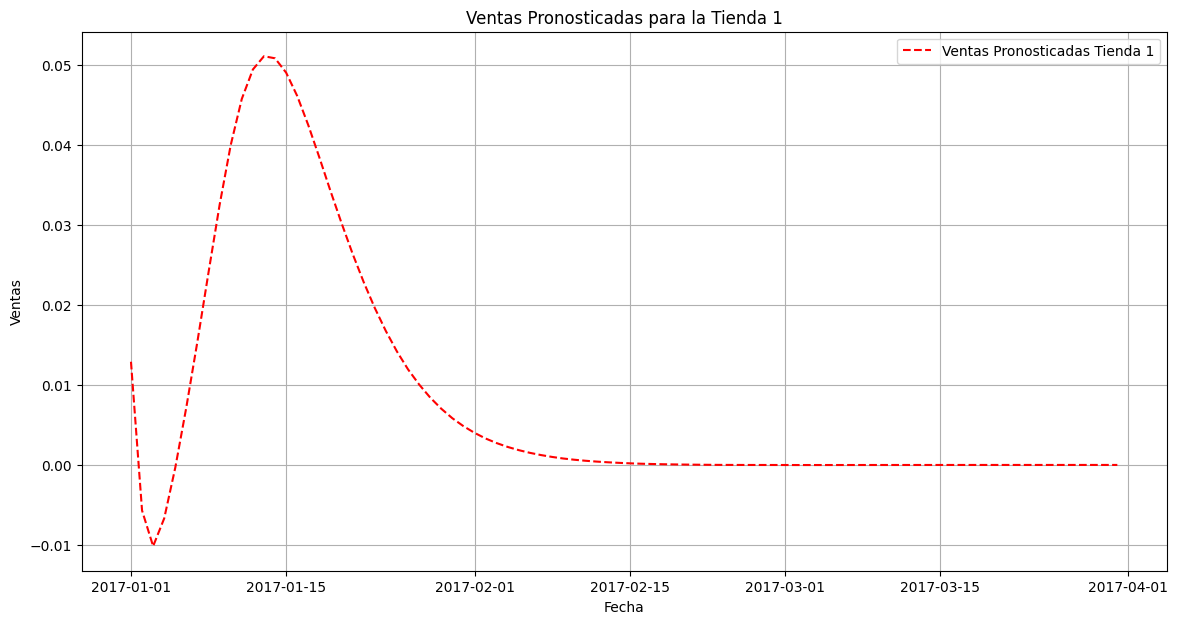

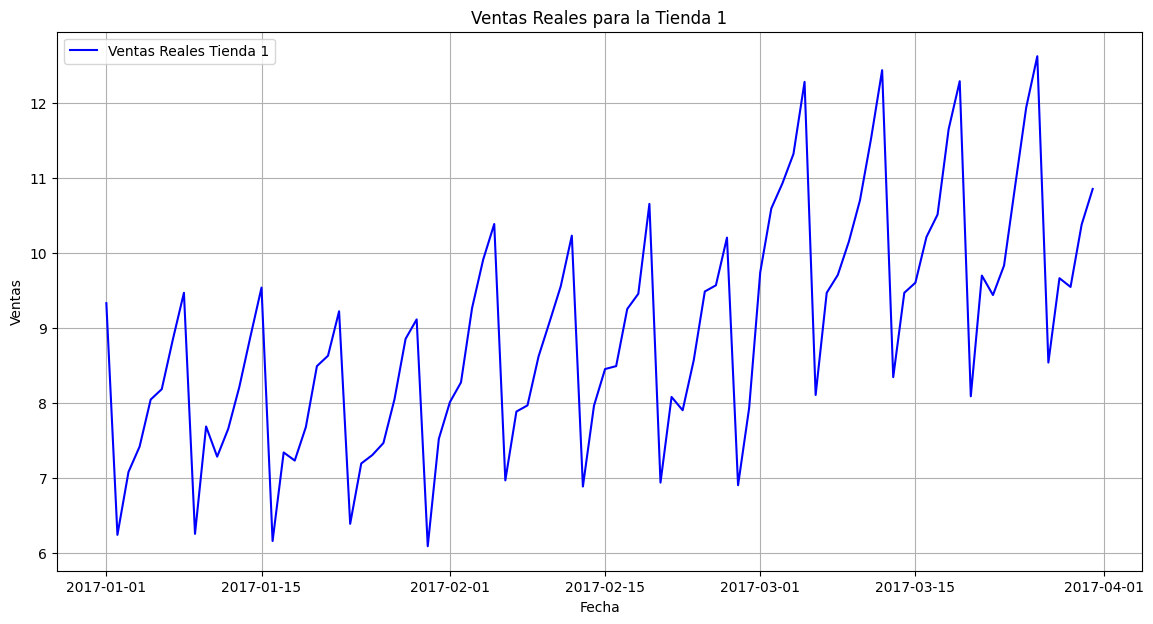


Métricas de error para la Tienda 1:
Mean Absolute Error (MAE): 8.95
Mean Squared Error (MSE): 82.47
Root Mean Squared Error (RMSE): 9.08


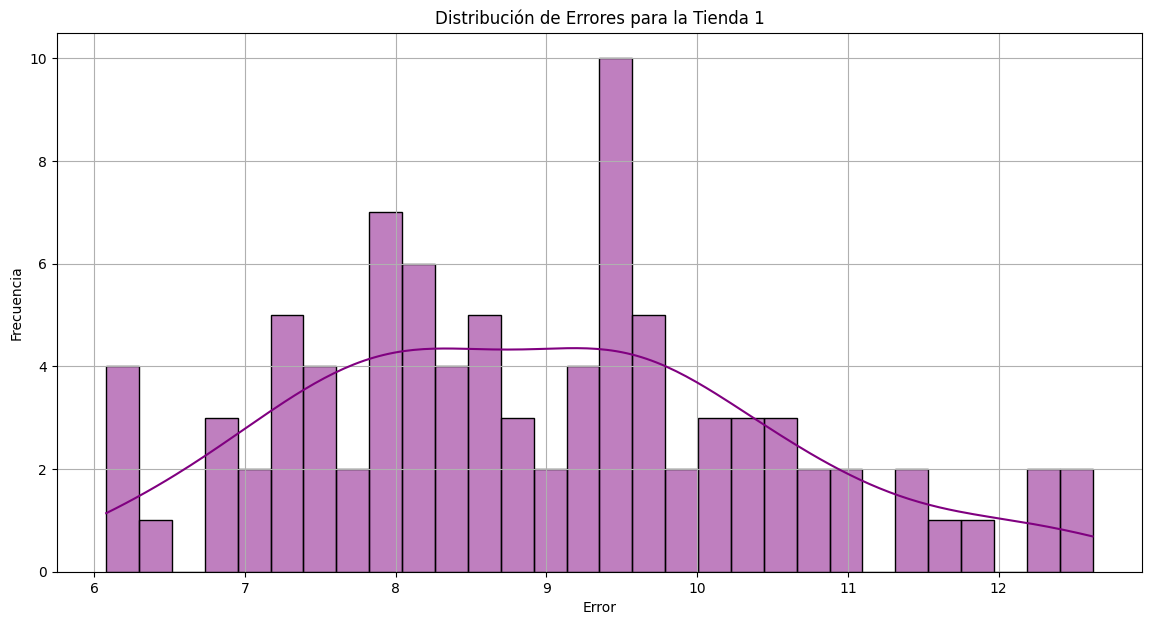

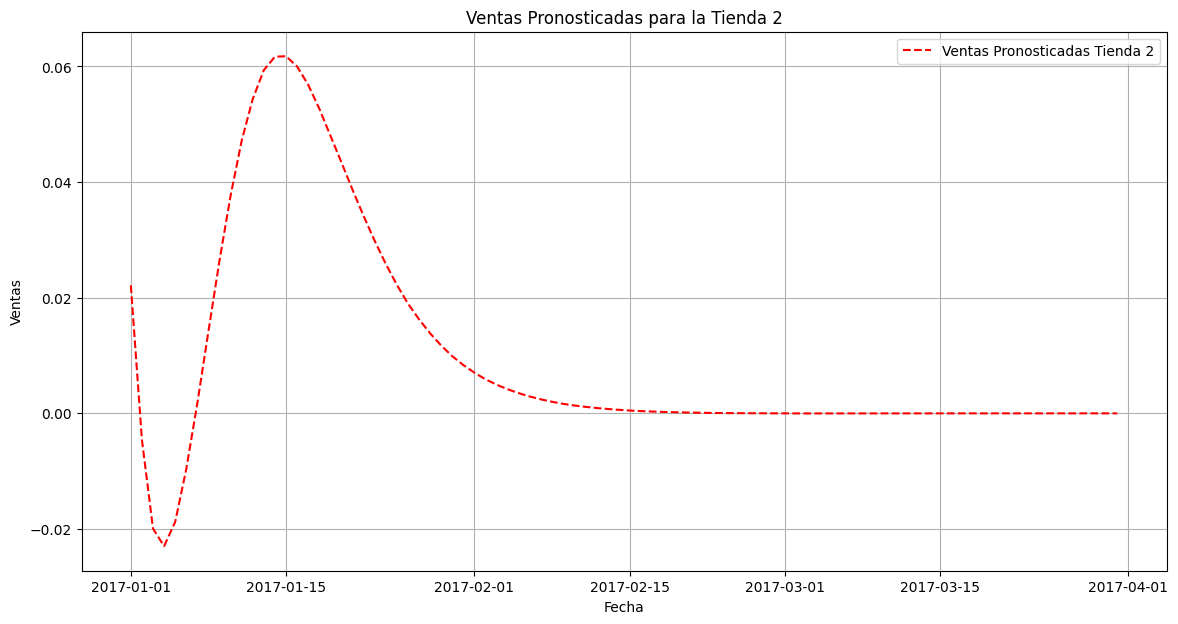

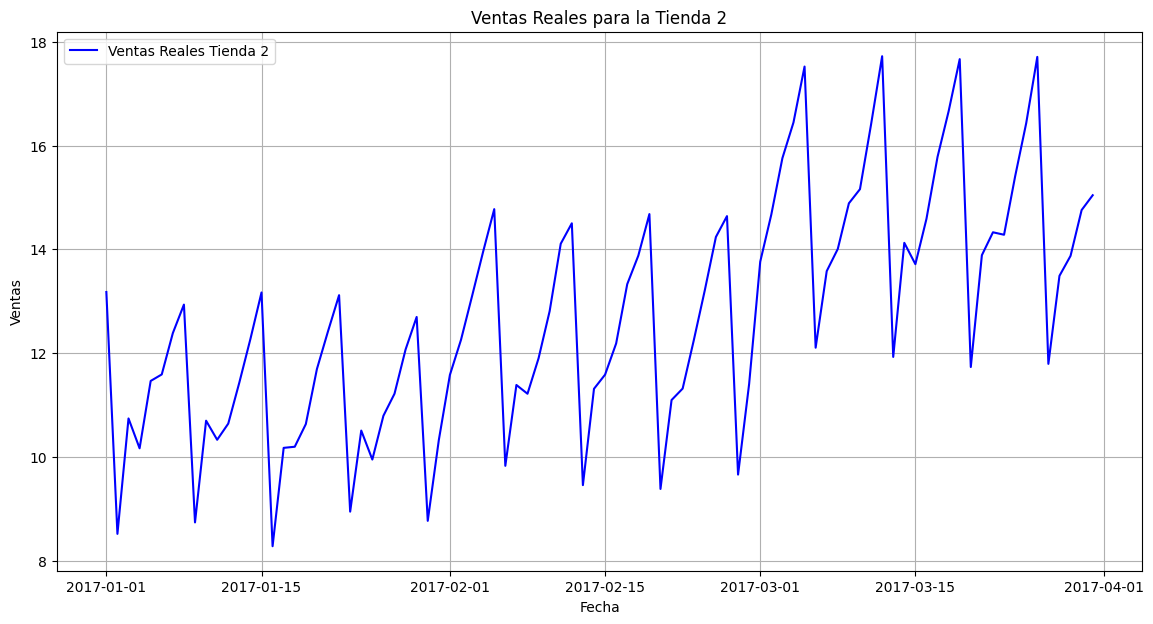


Métricas de error para la Tienda 2:
Mean Absolute Error (MAE): 12.70
Mean Squared Error (MSE): 166.56
Root Mean Squared Error (RMSE): 12.91


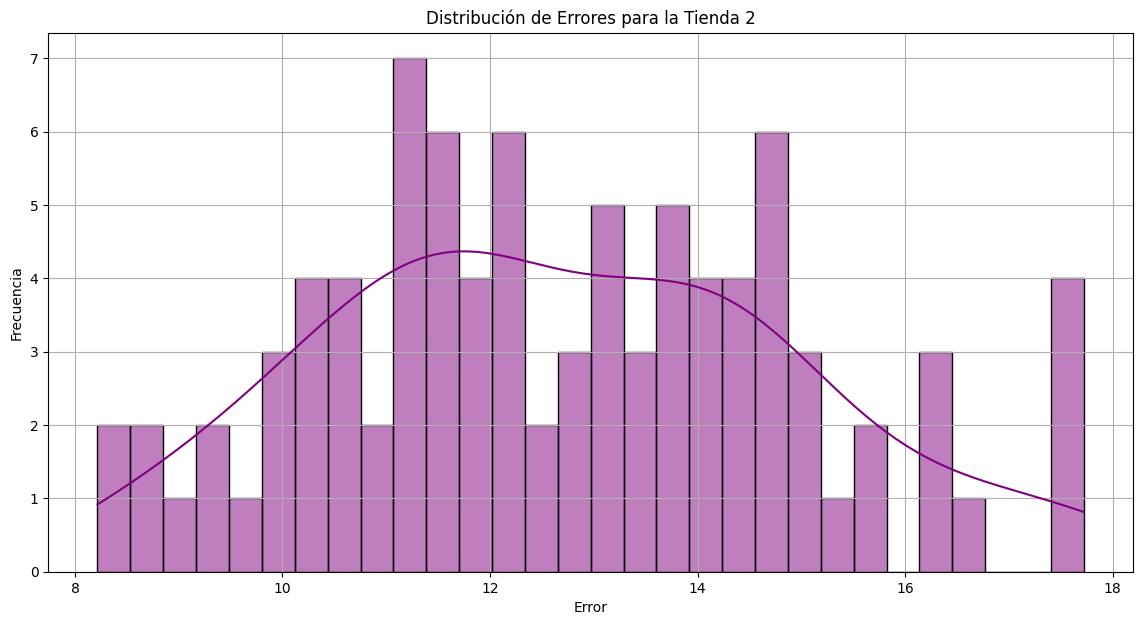

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Función para imprimir métricas y gráficos por tienda
def print_store_analysis(store_data, store):
    # Asegúrate de que 'date' sea realmente una fecha
    store_data['date'] = pd.to_datetime(store_data['date'])

    # Gráfico de ventas pronosticadas
    plt.figure(figsize=(14, 7))
    plt.plot(store_data['date'], store_data['forecasted_sales'], color='red', linestyle='--', label=f'Ventas Pronosticadas Tienda {store}')
    plt.title(f'Ventas Pronosticadas para la Tienda {store}')
    plt.xlabel('Fecha')
    plt.ylabel('Ventas')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Si hay ventas reales disponibles en store_data, gráficarlas
    if 'sales' in store_data:
        # Gráfico de ventas reales
        plt.figure(figsize=(14, 7))
        plt.plot(store_data['date'], store_data['sales'], color='blue', label=f'Ventas Reales Tienda {store}')
        plt.title(f'Ventas Reales para la Tienda {store}')
        plt.xlabel('Fecha')
        plt.ylabel('Ventas')
        plt.grid(True)
        plt.legend()
        plt.show()

        # Calcular errores si hay datos reales
        errors = store_data['sales'] - store_data['forecasted_sales']
        mae = mean_absolute_error(store_data['sales'], store_data['forecasted_sales'])
        mse = mean_squared_error(store_data['sales'], store_data['forecasted_sales'])
        rmse = np.sqrt(mse)

        # Imprimir métricas de error
        print(f"\nMétricas de error para la Tienda {store}:")
        print(f"Mean Absolute Error (MAE): {mae:.2f}")
        print(f"Mean Squared Error (MSE): {mse:.2f}")
        print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

        # Gráfico de distribución de errores
        plt.figure(figsize=(14, 7))
        sns.histplot(errors, bins=30, kde=True, color='purple')
        plt.title(f'Distribución de Errores para la Tienda {store}')
        plt.xlabel('Error')
        plt.ylabel('Frecuencia')
        plt.grid(True)
        plt.show()
    else:
        print(f"\nNo hay datos de ventas reales disponibles para la Tienda {store} para el período pronosticado.")

# Asumiendo que 'merged' es tu DataFrame que contiene tanto las predicciones como las ventas reales
for store in merged['store'].unique():
    store_data = merged[merged['store'] == store].sort_values('date')
    print_store_analysis(store_data, store)


Segunda operacion

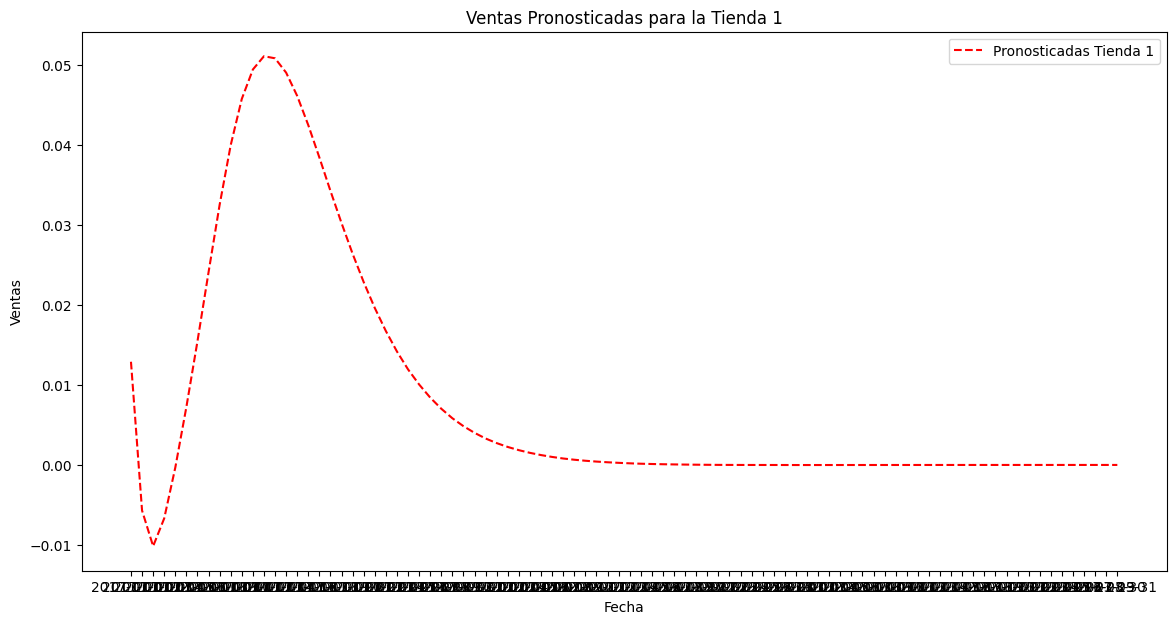

Estadísticas de ventas pronosticadas para la Tienda 1:
count    90.000000
mean      0.007953
std       0.015113
min      -0.010153
25%      -0.000003
50%       0.000076
75%       0.008120
max       0.051051
Name: forecasted_sales, dtype: float64


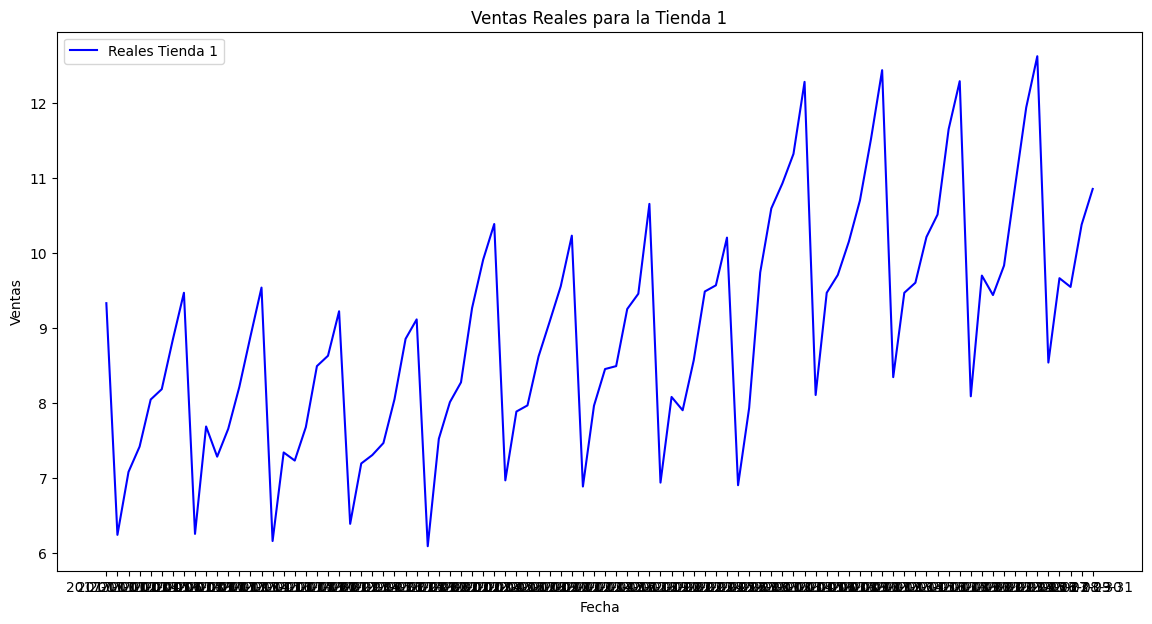

Estadísticas de ventas reales para la Tienda 1:
count    90.000000
mean      8.957239
std       1.547038
min       6.086580
25%       7.908009
50%       8.867965
75%       9.808442
max      12.623377
Name: sales, dtype: float64
Tienda 1 - MAE: 8.949285648733154, MSE: 82.47275070493782, RMSE: 9.08145091408514


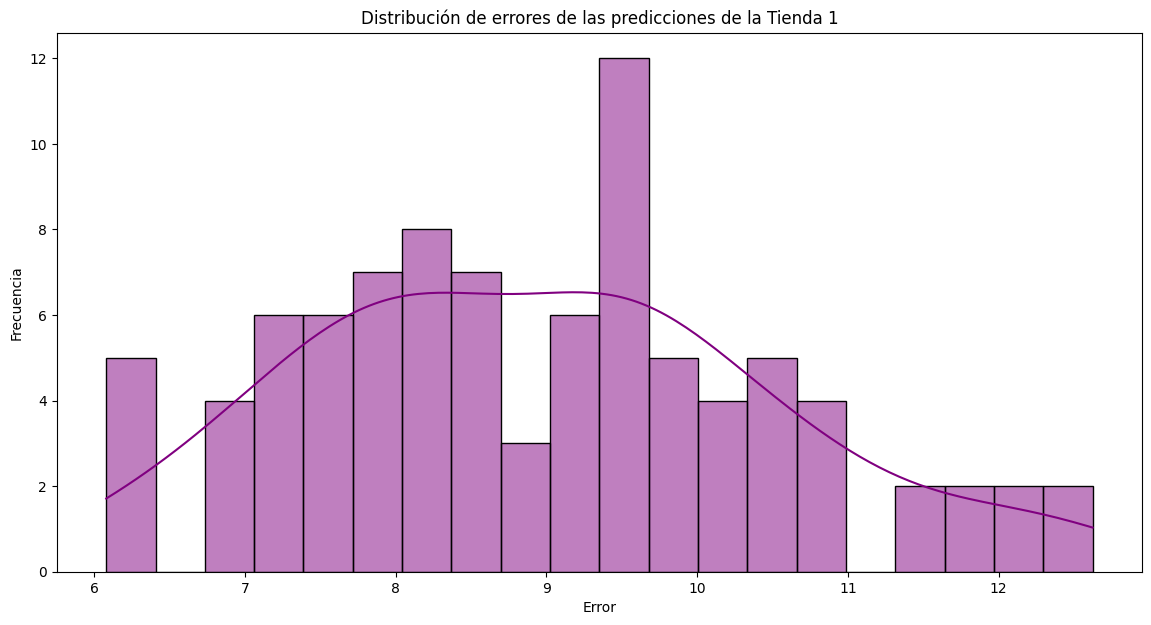

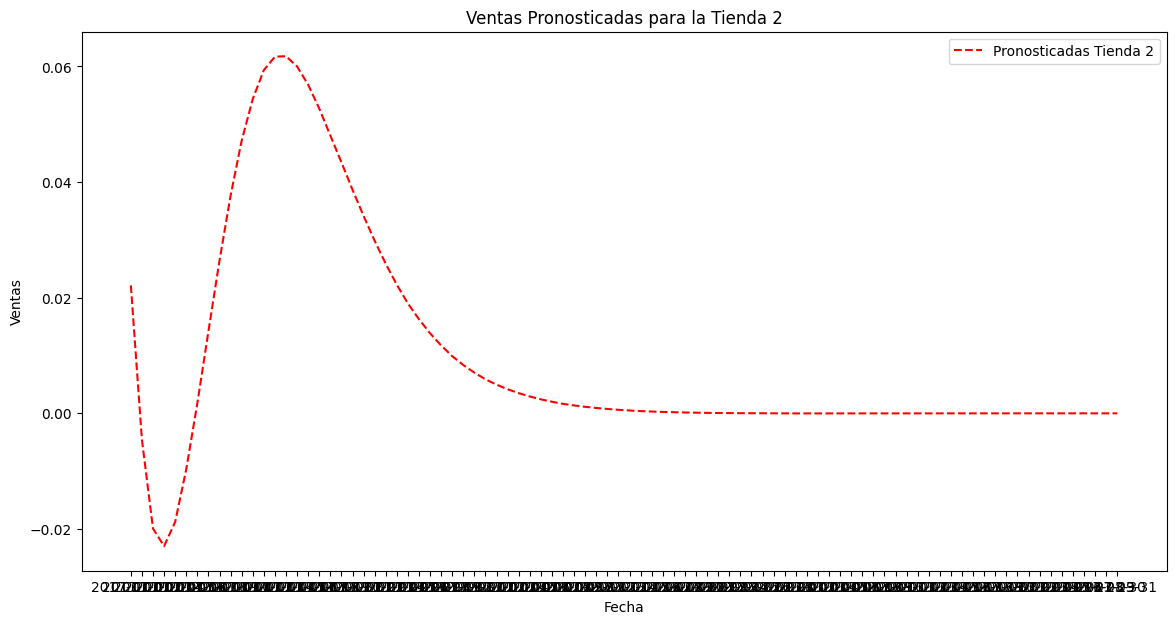

Estadísticas de ventas pronosticadas para la Tienda 2:
count    90.000000
mean      0.009364
std       0.019095
min      -0.022988
25%      -0.000003
50%       0.000172
75%       0.011270
max       0.061777
Name: forecasted_sales, dtype: float64


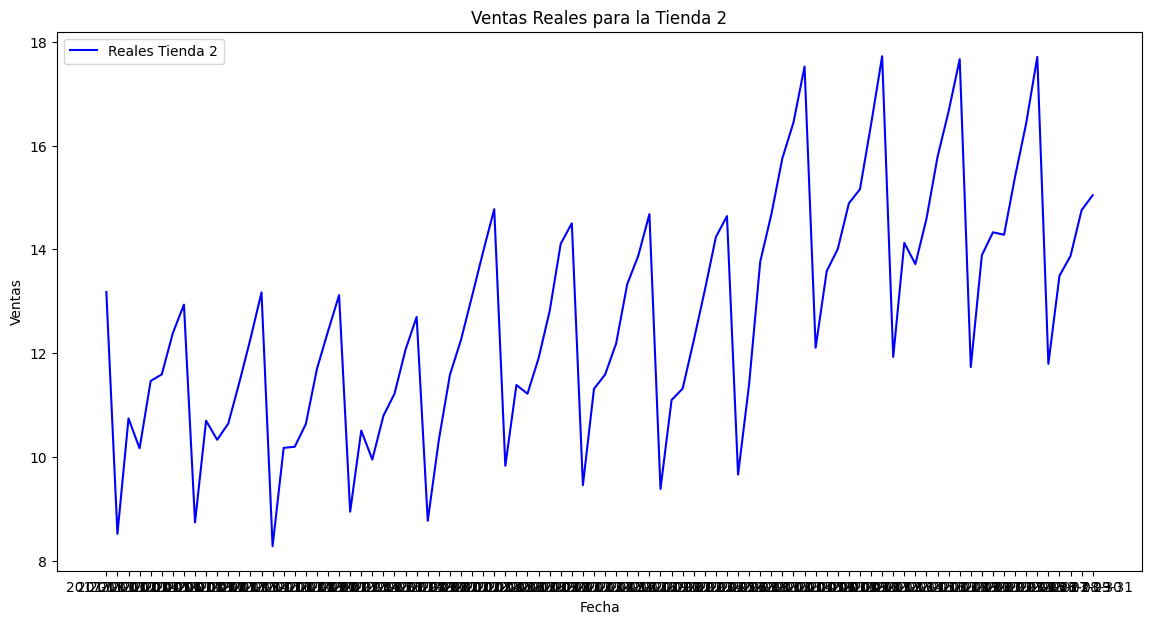

Estadísticas de ventas reales para la Tienda 2:
count    90.000000
mean     12.714238
std       2.274001
min       8.277056
25%      11.216450
50%      12.402597
75%      14.270563
max      17.722944
Name: sales, dtype: float64
Tienda 2 - MAE: 12.704873170400202, MSE: 166.55837405086024, RMSE: 12.905749650867254


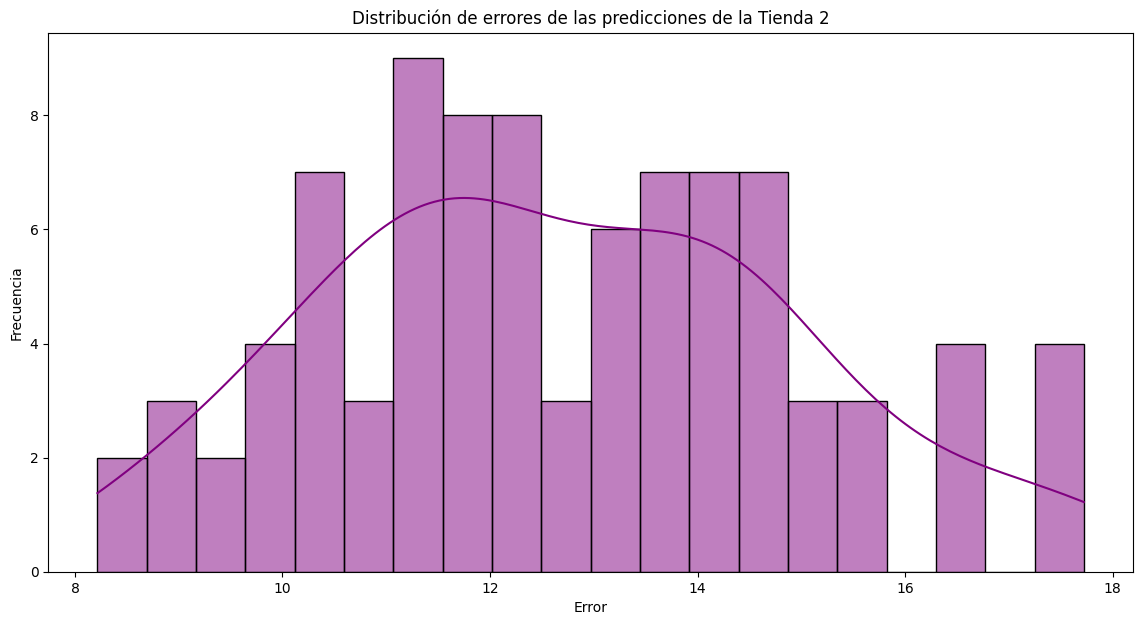

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# ... [parte inicial del código se mantiene igual]

def analyze_store(store_data, store):
    # Gráfico de ventas pronosticadas
    plt.figure(figsize=(14, 7))
    plt.plot(store_data['date'], store_data['forecasted_sales'], 'r--', label=f'Pronosticadas Tienda {store}')
    plt.title(f'Ventas Pronosticadas para la Tienda {store}')
    plt.xlabel('Fecha')
    plt.ylabel('Ventas')
    plt.legend()
    plt.show()

    # Imprimir estadísticas resumidas de las ventas pronosticadas
    print(f"Estadísticas de ventas pronosticadas para la Tienda {store}:")
    print(store_data['forecasted_sales'].describe())

    if 'sales' in store_data:
        # Gráfico de ventas reales
        plt.figure(figsize=(14, 7))
        plt.plot(store_data['date'], store_data['sales'], 'b', label=f'Reales Tienda {store}')
        plt.title(f'Ventas Reales para la Tienda {store}')
        plt.xlabel('Fecha')
        plt.ylabel('Ventas')
        plt.legend()
        plt.show()

        # Imprimir estadísticas resumidas de las ventas reales
        print(f"Estadísticas de ventas reales para la Tienda {store}:")
        print(store_data['sales'].describe())

        # Calcular y mostrar métricas de error
        mae = mean_absolute_error(store_data['sales'], store_data['forecasted_sales'])
        mse = mean_squared_error(store_data['sales'], store_data['forecasted_sales'])
        rmse = np.sqrt(mse)
        print(f'Tienda {store} - MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

        # Gráfico de errores
        errors = store_data['sales'] - store_data['forecasted_sales']
        plt.figure(figsize=(14, 7))
        sns.histplot(errors, bins=20, color='purple', kde=True)
        plt.title(f'Distribución de errores de las predicciones de la Tienda {store}')
        plt.xlabel('Error')
        plt.ylabel('Frecuencia')
        plt.show()

# Análisis por tienda
for store in merged['store'].unique():
    store_data = merged[merged['store'] == store]
    analyze_store(store_data, store)


Tercera


Estadísticas de ventas pronosticadas para la Tienda 1:
count    90.000000
mean      0.007953
std       0.015113
min      -0.010153
25%      -0.000003
50%       0.000076
75%       0.008120
max       0.051051
Name: forecasted_sales, dtype: float64


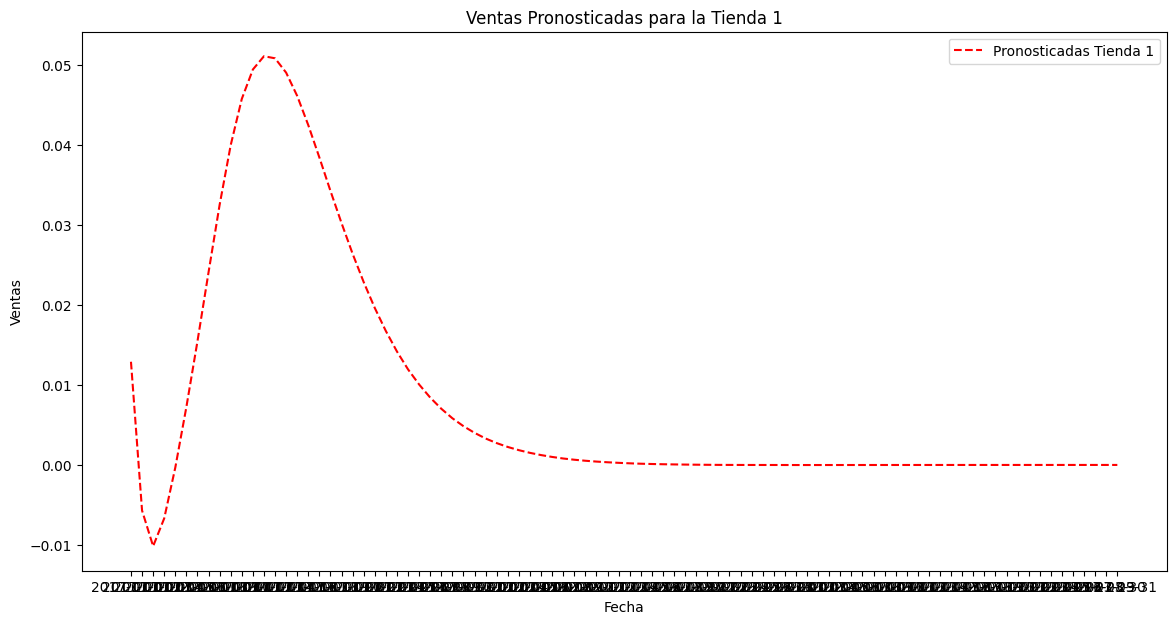


Estadísticas de ventas reales para la Tienda 1:
count    90.000000
mean      8.957239
std       1.547038
min       6.086580
25%       7.908009
50%       8.867965
75%       9.808442
max      12.623377
Name: sales, dtype: float64


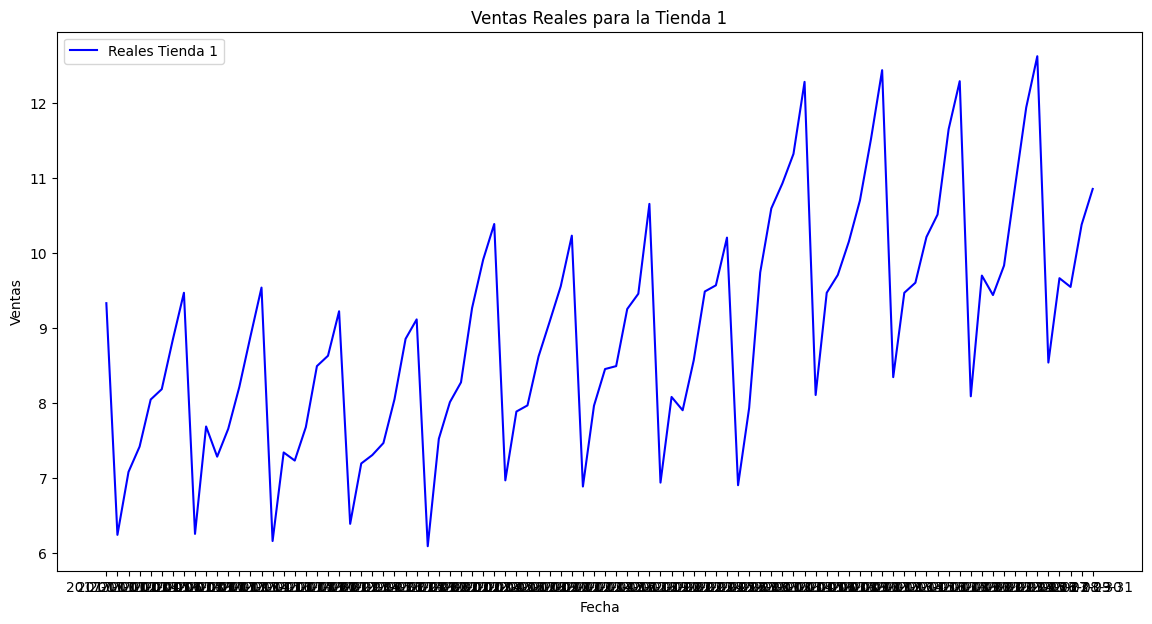


Tienda 1 - MAE: 8.949285648733154, MSE: 82.47275070493782, RMSE: 9.08145091408514


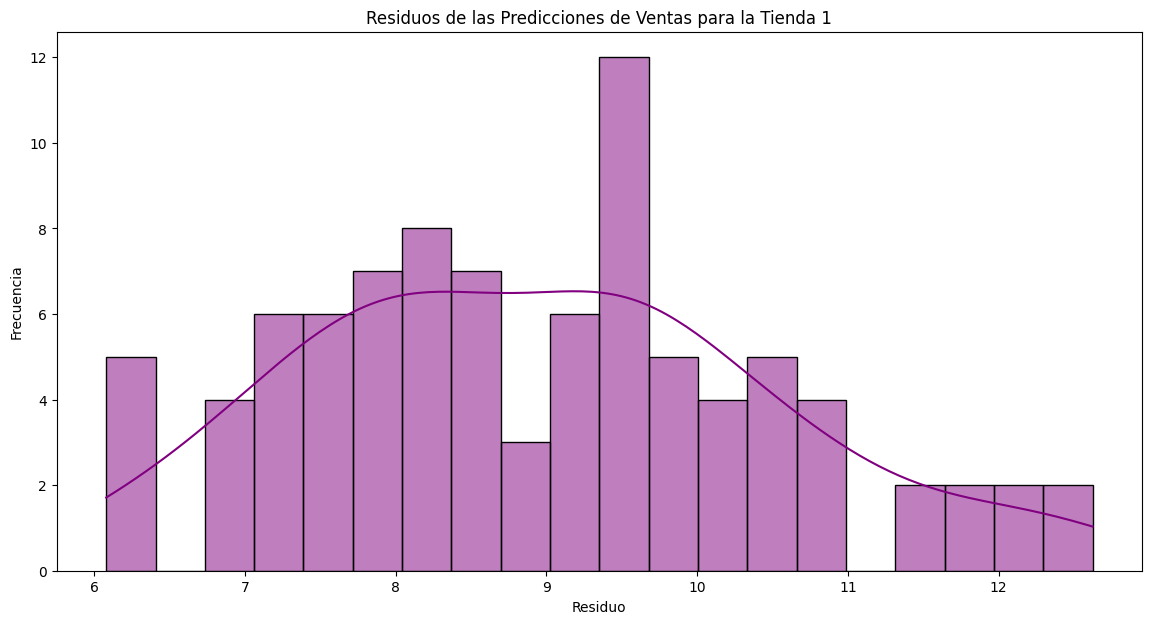

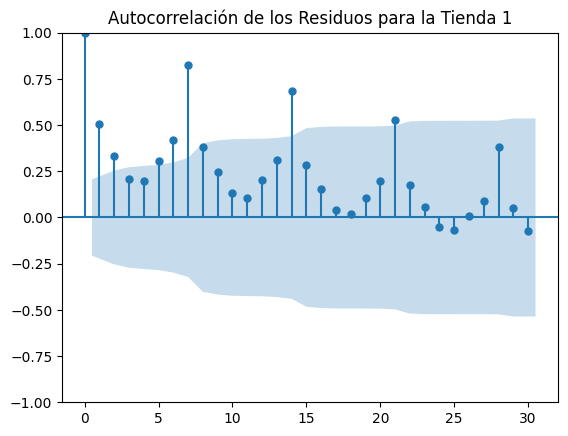

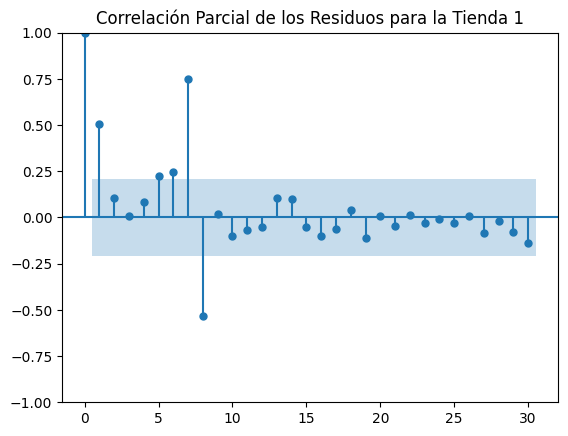


Estadísticas de ventas pronosticadas para la Tienda 2:
count    90.000000
mean      0.009364
std       0.019095
min      -0.022988
25%      -0.000003
50%       0.000172
75%       0.011270
max       0.061777
Name: forecasted_sales, dtype: float64


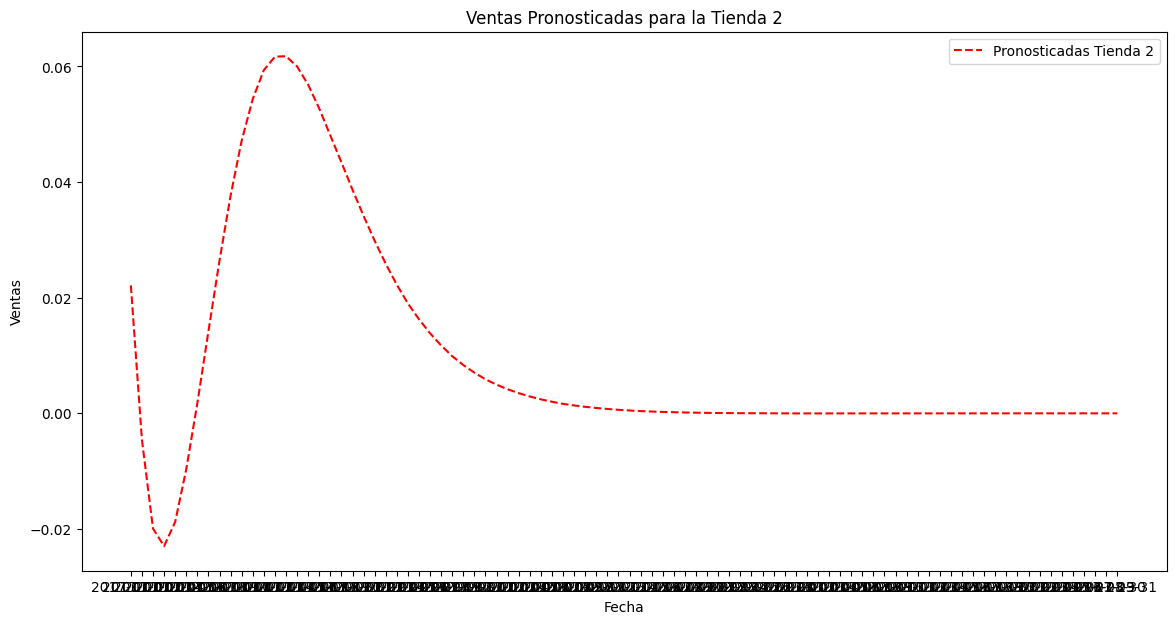


Estadísticas de ventas reales para la Tienda 2:
count    90.000000
mean     12.714238
std       2.274001
min       8.277056
25%      11.216450
50%      12.402597
75%      14.270563
max      17.722944
Name: sales, dtype: float64


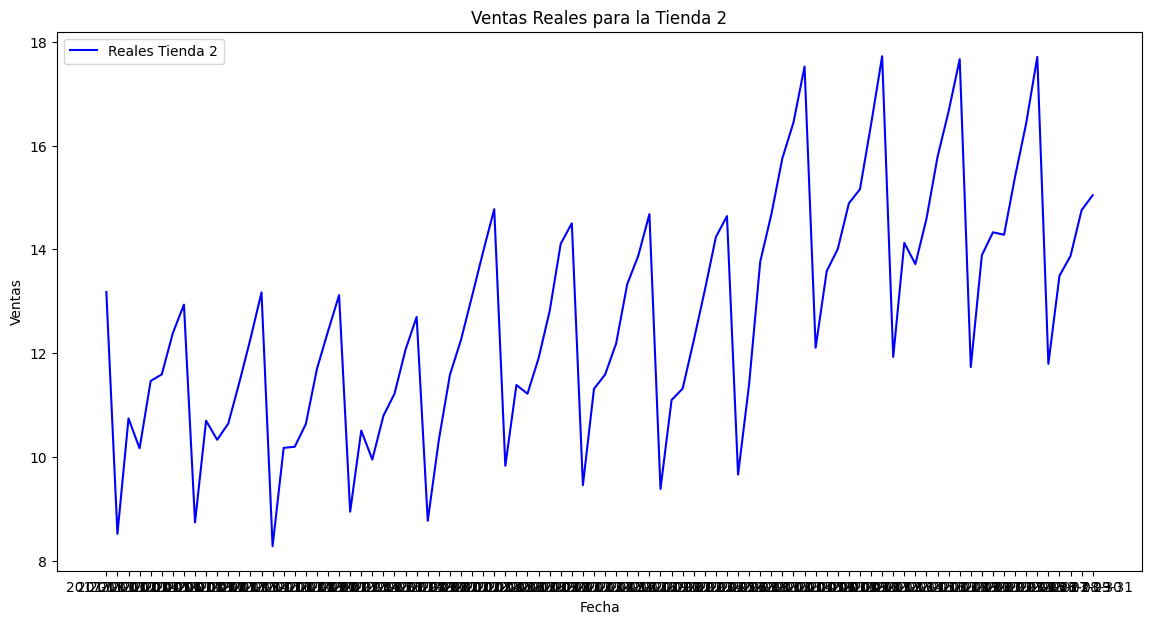


Tienda 2 - MAE: 12.704873170400202, MSE: 166.55837405086024, RMSE: 12.905749650867254


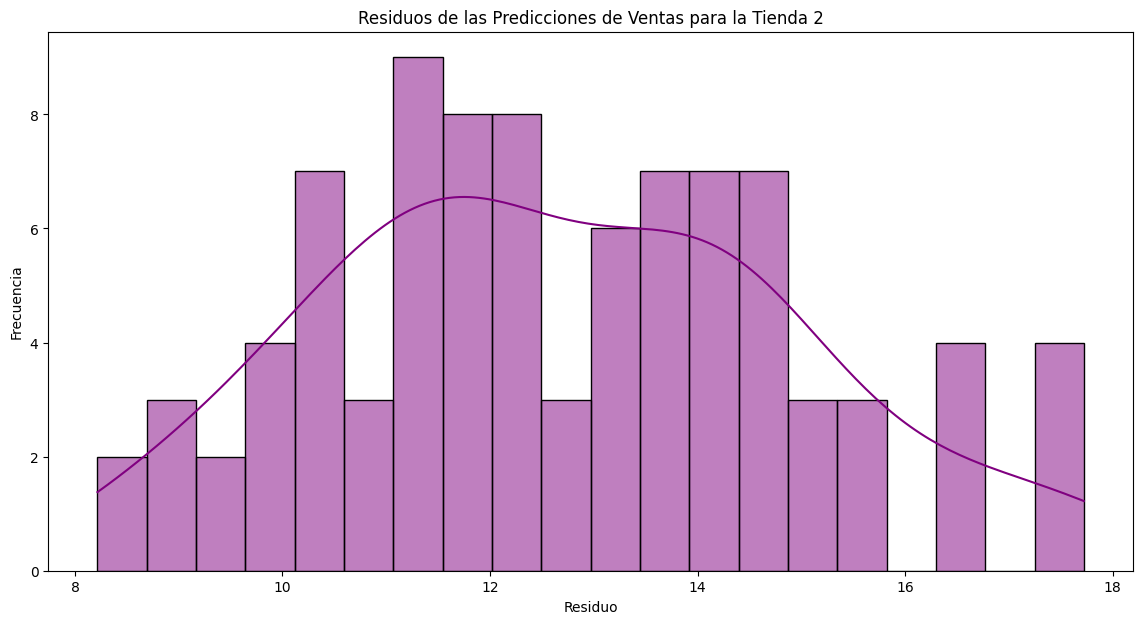

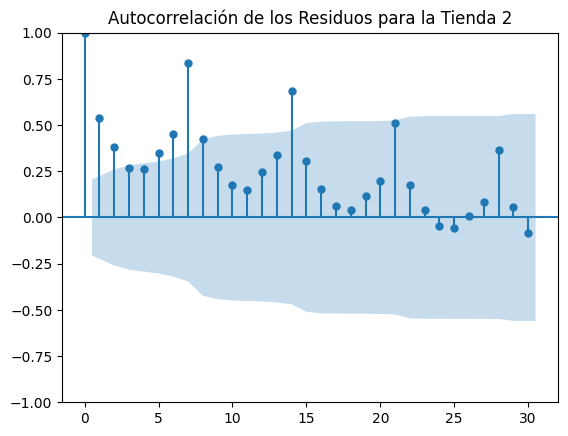

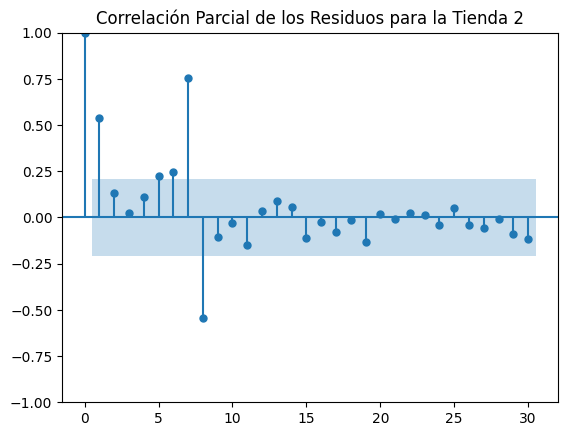

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# ... [parte inicial del código se mantiene igual]

def analyze_store(store_data, store):
    # Estadísticas descriptivas de las ventas pronosticadas
    print(f"\nEstadísticas de ventas pronosticadas para la Tienda {store}:")
    print(store_data['forecasted_sales'].describe())

    # Gráfico de ventas pronosticadas
    plt.figure(figsize=(14, 7))
    plt.plot(store_data['date'], store_data['forecasted_sales'], 'r--', label=f'Pronosticadas Tienda {store}')
    plt.title(f'Ventas Pronosticadas para la Tienda {store}')
    plt.xlabel('Fecha')
    plt.ylabel('Ventas')
    plt.legend()
    plt.show()

    # Si hay ventas reales disponibles, hacemos análisis adicionales
    if 'sales' in store_data:
        # Estadísticas descriptivas de las ventas reales
        print(f"\nEstadísticas de ventas reales para la Tienda {store}:")
        print(store_data['sales'].describe())

        # Gráfico de ventas reales
        plt.figure(figsize=(14, 7))
        plt.plot(store_data['date'], store_data['sales'], 'b-', label=f'Reales Tienda {store}')
        plt.title(f'Ventas Reales para la Tienda {store}')
        plt.xlabel('Fecha')
        plt.ylabel('Ventas')
        plt.legend()
        plt.show()

        # Calcular y mostrar métricas de error
        mae = mean_absolute_error(store_data['sales'], store_data['forecasted_sales'])
        mse = mean_squared_error(store_data['sales'], store_data['forecasted_sales'])
        rmse = np.sqrt(mse)
        print(f'\nTienda {store} - MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

        # Gráfico de residuos (errores) de las predicciones
        residuals = store_data['sales'] - store_data['forecasted_sales']
        plt.figure(figsize=(14, 7))
        sns.histplot(residuals, bins=20, color='purple', kde=True)
        plt.title(f'Residuos de las Predicciones de Ventas para la Tienda {store}')
        plt.xlabel('Residuo')
        plt.ylabel('Frecuencia')
        plt.show()

        # Gráfico de autocorrelación de los residuos para verificar la aleatoriedad
        plot_acf(residuals, lags=30, title=f'Autocorrelación de los Residuos para la Tienda {store}')
        plt.show()

        # Gráfico de correlación parcial de los residuos
        plot_pacf(residuals, lags=30, title=f'Correlación Parcial de los Residuos para la Tienda {store}')
        plt.show()

# Análisis por tienda
for store in merged['store'].unique():
    store_data = merged[merged['store'] == store]
    analyze_store(store_data, store)


10. Interpretabilidad del modelo